# TASK 1 - Prediction using Supervised ML

**To Predict the percentage of marks of the students based on the number of hours they studied**

**Author - Dhwani Shah**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [14]:
data = pd.read_csv('/Internship/Task_1/Dataset_Task1.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [15]:
data.shape

(25, 2)

**We have 25 Rows and 2 Columns.**

In [16]:
# Check if there are any null value in the Dataset
data.isnull == True

False

In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**There is no null value in the Dataset so, we can now visualize our Data.**

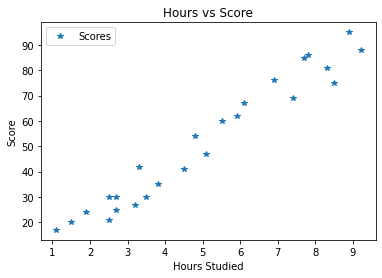

In [18]:
data.plot(x='Hours', y='Scores', style='*')
plt.title('Hours vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

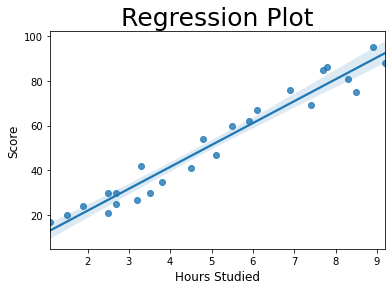

In [26]:
sb.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=25)
plt.ylabel('Score', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**Checking Correlation**

In [27]:
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


# **It is confirmed that the variables are positively correlated.**

**Training the Model**

**1) Splitting the Data**

In [28]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

 **2) Fitting the Data into the model**

In [29]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Model Trained Suceessfully!")

Model Trained Suceessfully!


# Comparing the Predicted Marks with the Actual Marks

In [34]:
pred_y = regressor.predict(X_test)
compare_scores = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': pred_y})
compare_scores

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Visually Comparing the Predicted Marks with the Actual Marks

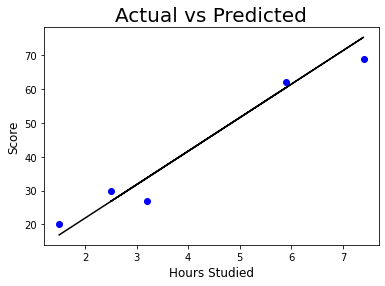

In [35]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Score', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**Here, Blue dots represents the Actual Score and Black Line represents the predicted Score.**

# Evaluating The Model

In [36]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(y_test,pred_y))

Mean absolute error:  4.183859899002975


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.**

# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [37]:
hour = [9.25]
answer = regressor.predict([hour])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692


# According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.692 marks.